# Data Preprocessing I

This tutorial contains Python examples for data preprocessing, focusing on techniques for cleaning. Follow the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT+ENTER keys simultaneously.

## Data Quality Issues

Poor data quality can adversely affect data mining. Common data quality issues include noise, outliers, missing values, and duplicate data. This section presents Python code examples to address some of these issues, using the breast cancer patients dataset from the UCI machine learning repository.

### Importing Libraries and Configuration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
from matplotlib.pylab import rcParams


### Settings

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)



### Load the dataset and display its first 10 data samples.

In [ ]:
# the URL where the dataset is located
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# the column names since the dataset does not include headers
columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
# Load the dataset, converting "?" to np.nan
data = pd.read_csv(url, names=columns, na_values="?")
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
display(data.info())
# Display the first few rows of the dataframe to verify "?" has been replaced with np.nan
display (data.head(n=10))

Number of instances = 699
Number of attributes = 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code                  699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


None

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


### Remove the irrelevant feature
The sample code only presents the ID of the sample, which lacks meaningful information. Therefore, it will be removed first.

In [ ]:
data.drop(columns=['Sample code'], inplace=True)

### Missing Values

Objects often have missing attribute values. Sometimes, this is because the information wasn't gathered; other times, certain attributes don't apply to all data instances. This section shows various methods to manage missing values. We'll start by counting the missing values in each column of the dataset.

In [ ]:
print('Number of missing values:')
count_missing_values = data.isna().sum()
count_missing_values

Number of missing values:


Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

The missing values are only found in the attribute 'Bare Nuclei'. In the example below, we fill these missing spots with the attribute's median value. To illustrate, we'll display a selection of data points before and after this replacement.

In [ ]:
print('Before replacing missing values:')
display(data[22:25])
imputer = SimpleImputer(strategy='median')
data[["Bare Nuclei"]] = imputer.fit_transform(data[["Bare Nuclei"]])

print('\nAfter replacing missing values:')
display(data[22:25])

Before replacing missing values:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
22,3,1,1,1,2,1.0,2,1,1,2
23,8,4,5,1,2,NaN,7,3,1,4
24,1,1,1,1,2,1.0,3,1,1,2



After replacing missing values:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
22,3,1,1,1,2,1.0,2,1,1,2
23,8,4,5,1,2,1.0,7,3,1,4
24,1,1,1,1,2,1.0,3,1,1,2


An alternative method to handling missing values is to discard the data points that contain missing values. This is efficiently achieved by using the dropna() function on the dataframe, which eliminates any entries containing missing information.

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data_without_na = data.dropna()
print('Number of rows after discarding missing values = %d' % (data_without_na.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 699


### Outliers
Outliers are data objects with characteristics that are considerably different than most of the other data objects in the data set. The following example demonstrates how to use a boxplot to detect which columns in a dataset may have outliers.

<Axes: >

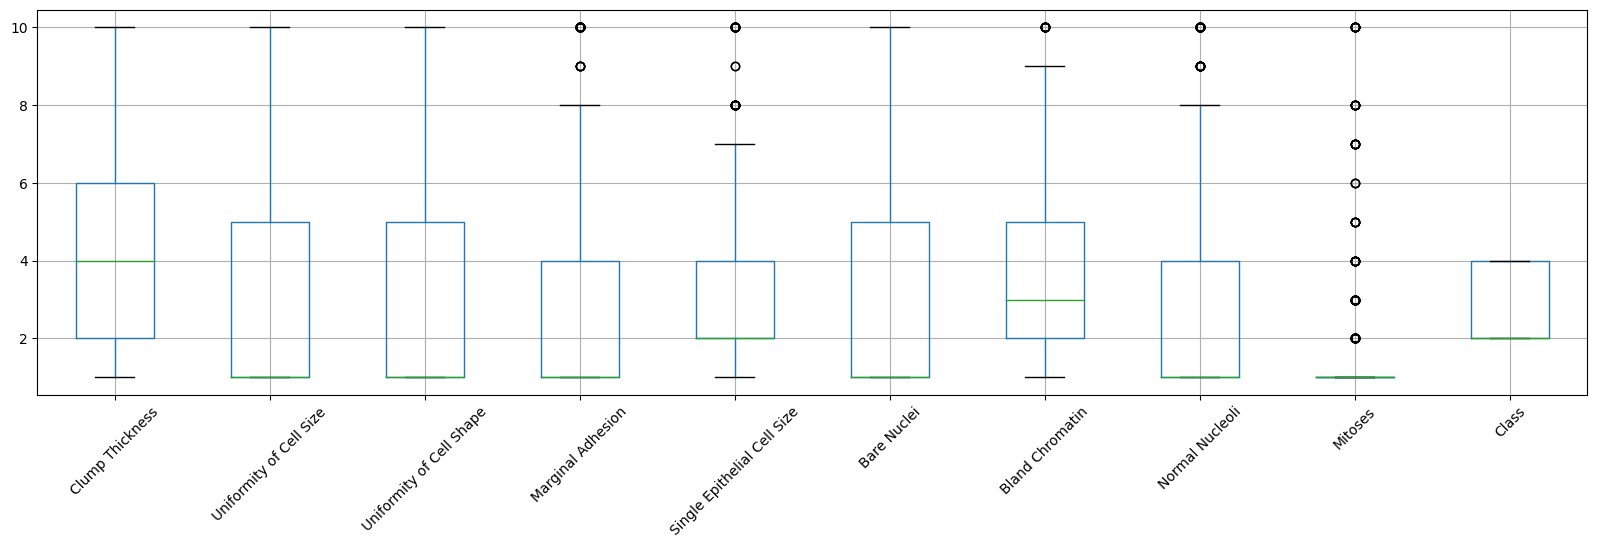

In [ ]:
# rot=45 rotates the labels by 45 degrees.
data_without_na.boxplot(figsize=(20,5), rot=45)


From the boxplots, we can see that five attributes: edge adhesion, single epithelial cell size, asexual chromatin, normal nucleoli, and mitoses contain abnormally high values, indicating the presence of outliers. To solve this problem, one approach is to calculate the Z-score for each attribute and remove samples that contain attributes with abnormally high or low Z-scores (for example, if Z > 3 or Z <= -3).

In [ ]:
z_scores = (data_without_na - data_without_na.mean(numeric_only=True)) / data_without_na.std(numeric_only=True)

z_scores[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526,1.377569
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666,1.377569
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666,-0.724878
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666,1.377569
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666,-0.724878


The following code demonstrates how to exclude samples where any attribute has a Z-score greater than 3 or less than or equal to -3.

In [ ]:
print('Number of rows before discarding outliers = %d' % (z_scores.shape[0]))

z_filtered = z_scores.loc[((z_scores > -3).sum(axis=1)==10) & ((z_scores <= 3).sum(axis=1)==10),:]
print('Number of rows after discarding outliers = %d' % (z_filtered.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding outliers = 648


### Handling Duplicate Data

Datasets, particularly those compiled from various sources, might have duplicate or almost identical entries. Below, we explore how to identify and remove duplicate records within the dataset.

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 242


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
28,2,1,1,1,2,1.0,2,1,1,2


In [ ]:
print('Number of rows before removing duplicates:', data_without_na.shape[0])
data_no_duplicates = data_without_na.drop_duplicates()
print('Number of rows after removing duplicates:', data_no_duplicates.shape[0])

Number of rows before removing duplicates: 699
Number of rows after removing duplicates: 457
